In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maintenance-of-naval-propulsion-plants-data-set/navalplantmaintenance.csv


### 1. Σύντομη παρουσίαση του dataset (τι περιγράφει).
To dataset αυτό αφορά  εναν  προσομοιωτή ενός ναυτικού σκάφους. Τα διάφορα χαρακτηριστικά που το αποτελούν οδηγούν σε  πλήρη προσομοιωσή (Propeller, Hull, GT, Gear Box και Controller) για την πρόωση του σκαφους. Με αυτά τα χαρακτηριστικά μπορούμε να περιγράψουμε με τις παρακάτω παραμέτρους:
- Ταχύτητα πλοίου (γραμμική λειτουργία της θέσης μοχλού lp).
- Συντελεστής αποικοδόμησης συμπιεστή kMc.
- Συντελεστής αποικοδόμησης στροβίλων kMt.
έτσι ώστε κάθε πιθανή κατάσταση αποδόμησης να μπορεί να περιγραφεί με συνδυασμό αυτού του τριπλού (lp, kMt, kMc).

### 2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών.
(11934,16) απο τα οποία απομακρύναμε τα 'gt_c_i_pressure' και 'gt_c_i_temp'  μιας και είχαν την ίδια τιμή για όλεςτις εγγραφες

### 3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;
Κάναμε match τις επικεφαλίδες απο το read.txt φιλε και επίσης το dataset ειναι αριθμημένο (index)

### 4. Ποια / ποιες είναι οι κολόνες με τις μεταβλητές - στόχους;
Οι μεταβλητές στόχοι είναι οι 2 τελευταίες κολόνες 'gt_c_decay' και 'gt_t_decay'

### 5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?
Σε αυτό το ντάτασετ δεν κάναμε μετατροπή στα αρχεία 

### 6.Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;
Δεν υπήρχαν δείγματα με απουσιάζουσες τιμές σε αυτό το dataset 

### 7. Διαχωρίστε σε train και test set.
Παρακαλώ δείτε παρακάτω για τον διαχωρισμό του dataset 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm


In [3]:
import pandas as pd 
headers  = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']
naval_df = pd.read_csv(os.path.join(dirname, filename), delim_whitespace=True, header=None, names = headers)
naval_df.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
# Δεν υπαρχουν απουσιαζουσες τιμες 
naval_df.replace('?', np.nan, inplace=True)
naval_df.head()


print('Shape of the Naval Dataset:',naval_df.shape)
#naval_df.isna().sum()

Shape of the Naval Dataset: (11934, 18)


In [5]:
naval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lever_position       11934 non-null  float64
 1   ship_speed           11934 non-null  float64
 2   gt_shaft             11934 non-null  float64
 3   gt_rate              11934 non-null  float64
 4   gg_rate              11934 non-null  float64
 5   sp_torque            11934 non-null  float64
 6   pp_torque            11934 non-null  float64
 7   hpt_temp             11934 non-null  float64
 8   gt_c_i_temp          11934 non-null  float64
 9   gt_c_o_temp          11934 non-null  float64
 10  hpt_pressure         11934 non-null  float64
 11  gt_c_i_pressure      11934 non-null  float64
 12  gt_c_o_pressure      11934 non-null  float64
 13  gt_exhaust_pressure  11934 non-null  float64
 14  turbine_inj_control  11934 non-null  float64
 15  fuel_flow            11934 non-null 

In [6]:
# Απαλοιφουμε τα παρακατω columns μιας και εχουν την ιδια τιμη για ολες τις εγγραφες

np.unique(naval_df['gt_c_i_pressure'])
np.unique(naval_df['gt_c_i_temp'])

naval_df = naval_df.drop(['gt_c_i_pressure', 'gt_c_i_temp'], axis=1)
naval_df.shape

(11934, 16)

Text(0.5, 0, 'sampleID')

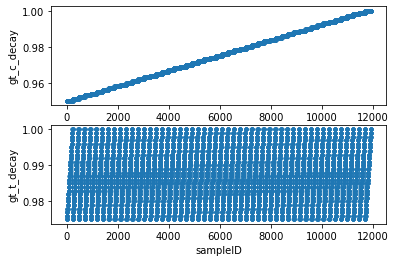

In [7]:
# Οι στήλες που θέλουμε να προβλεψουμε είναι:  'GT C decay' &  'GT T decay'
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(naval_df.index, naval_df.gt_c_decay,'.-')
plt.ylabel('gt_c_decay')

plt.subplot(212)
plt.plot(naval_df.index, naval_df.gt_t_decay,'.-')
plt.ylabel('gt_t_decay')

plt.xlabel('sampleID')

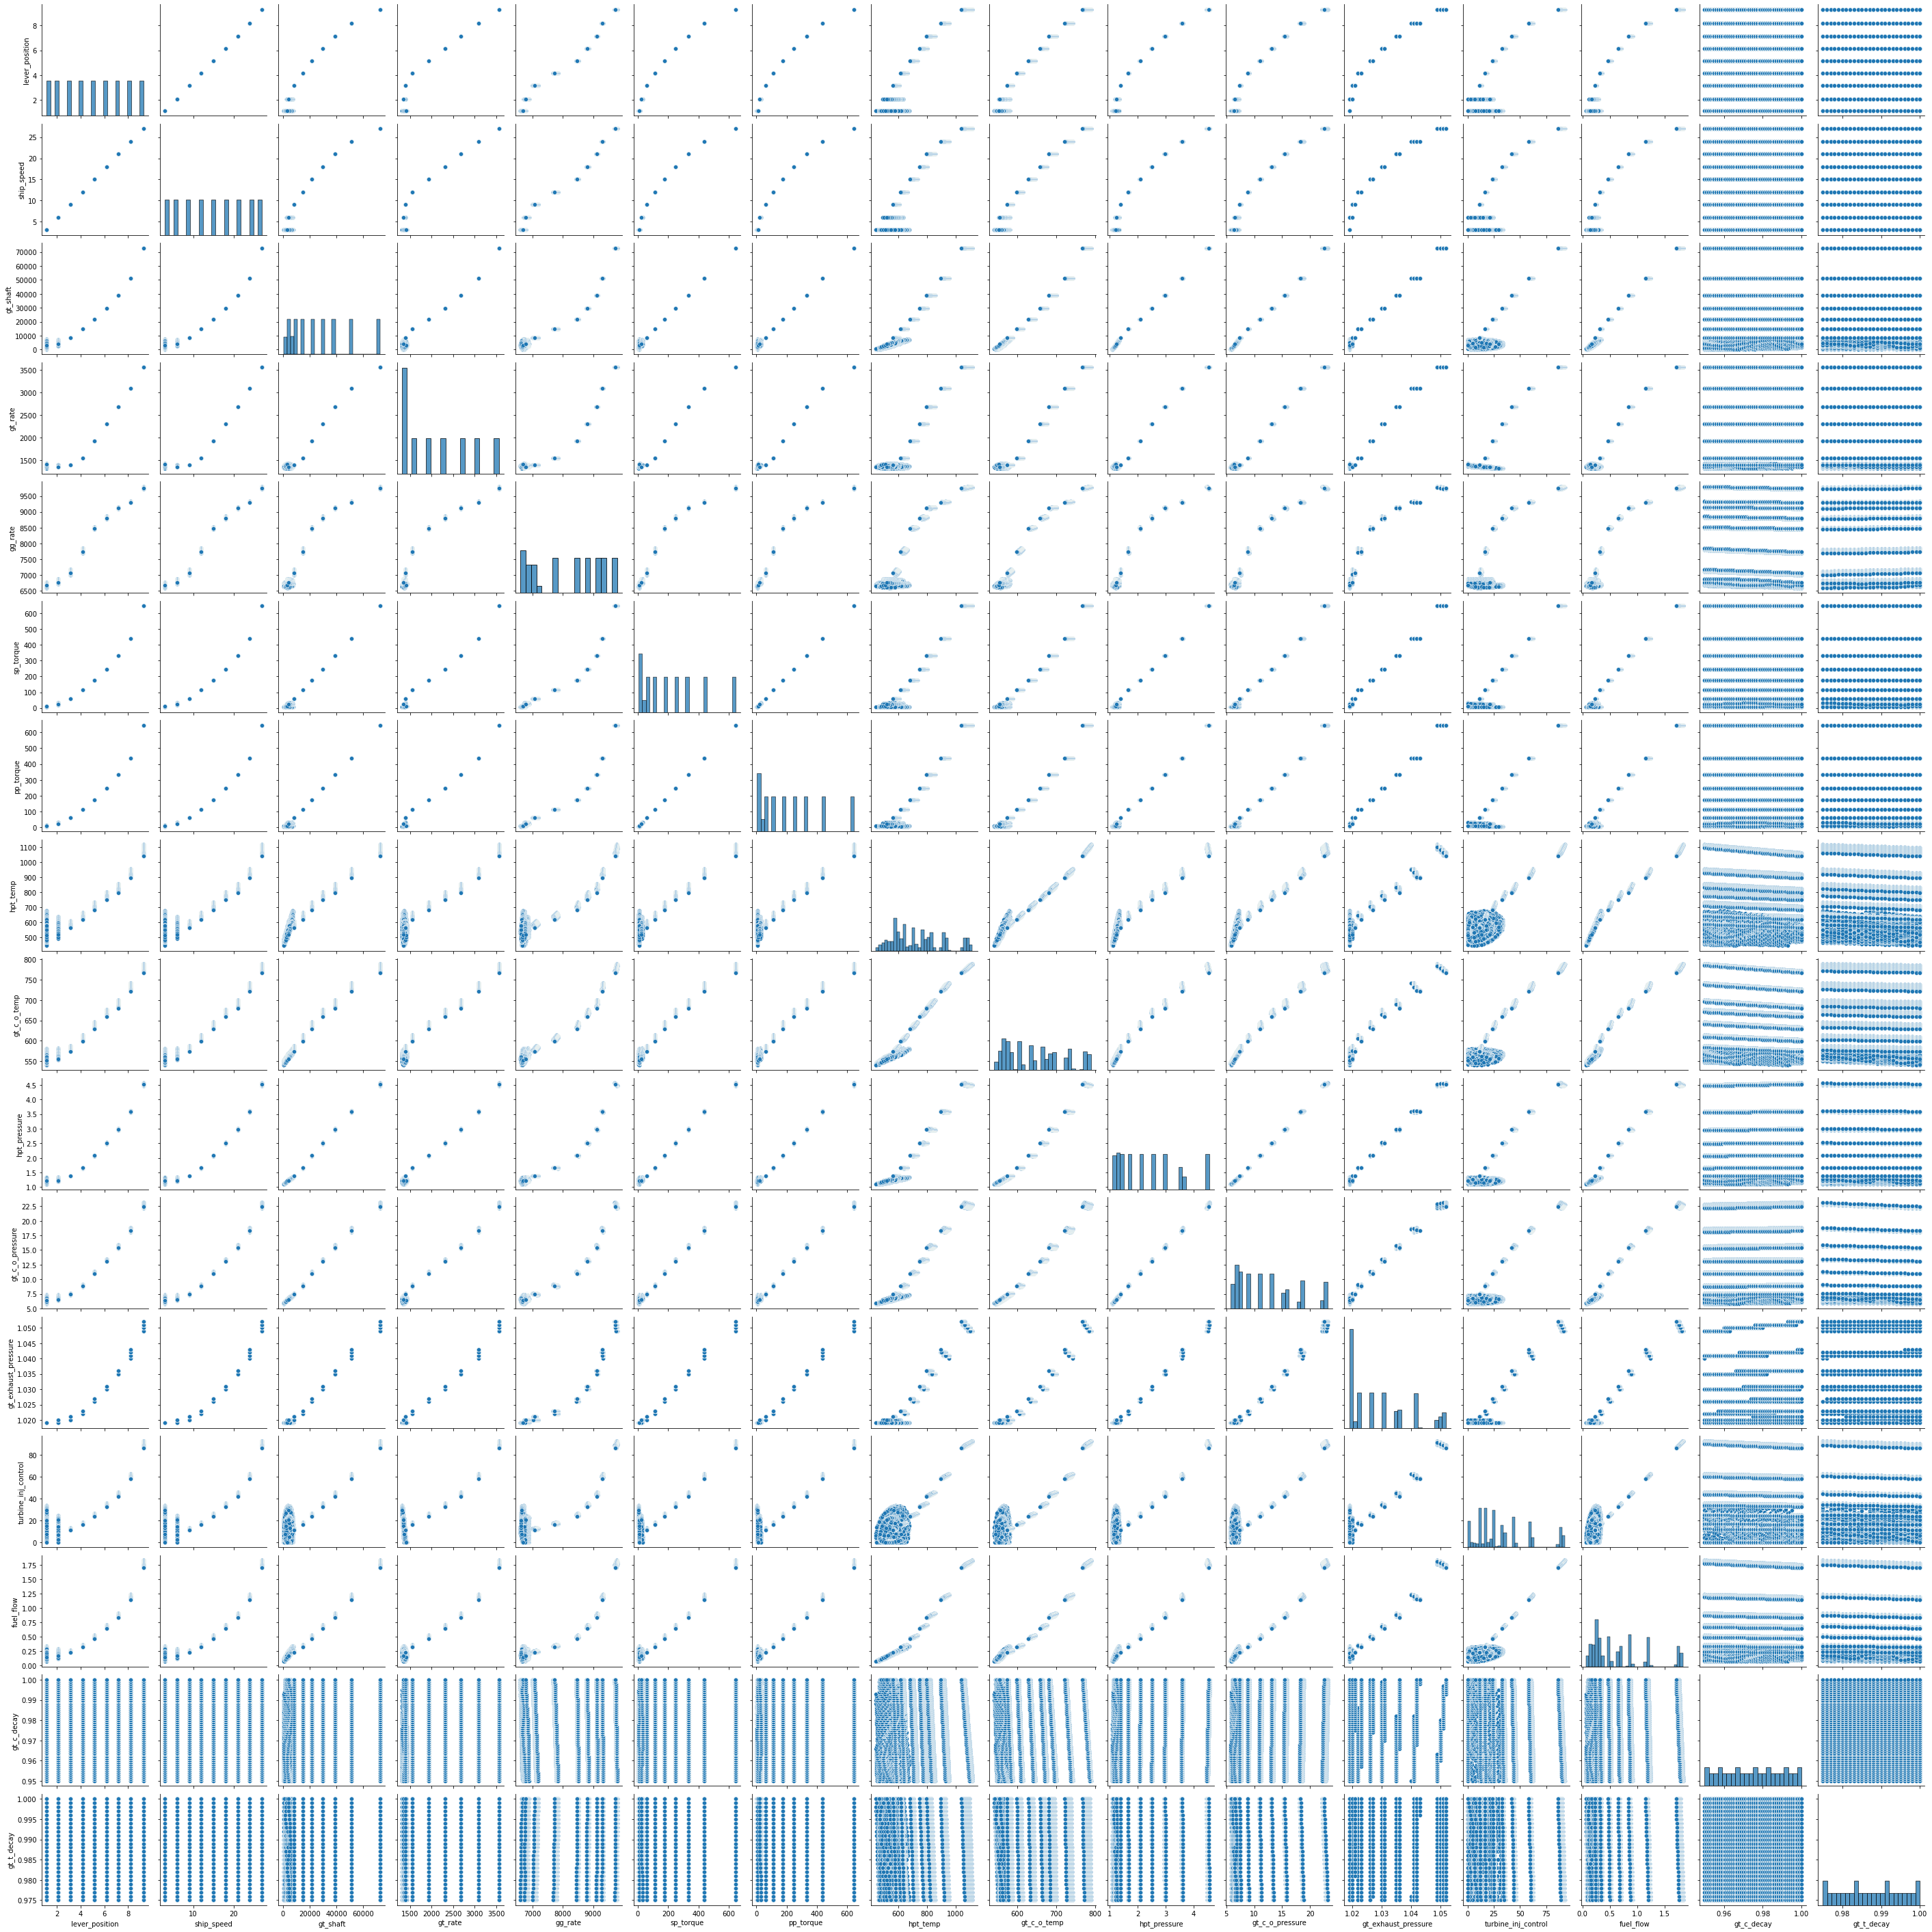

In [8]:
# Με το παρακάτω 'fancy' plot μπορούμε να ελέξγουμε τα patterns μεταξύ των διαφορετικών features
# Τα οποία φαίνεται να είναι σχεδόν γραμμικά 
sns.pairplot(naval_df)
plt.show()

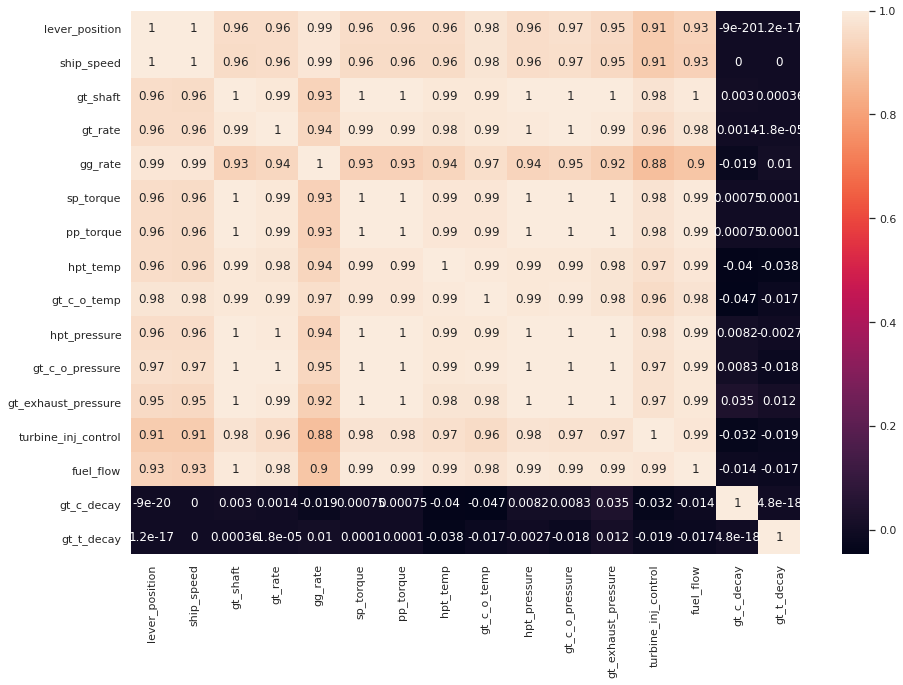

In [9]:
# Σχεδιάζουμε και το correlation matrix για να δουμε συσχετίσεις μεταξύ των δεδομένων 
plt.figure(figsize=(15,10))
cols = naval_df.corr().index
corr_mat = np.corrcoef(naval_df[cols].values.T)
sns.set(font_scale =1)
hm = sns.heatmap(corr_mat, annot=True, yticklabels = cols.values, xticklabels=cols.values)
plt.show()

In [10]:
# Παρατηρούμε υψηλές συσχετίσεις μεταξύ των χαρακτηριστικών
# Θα χρησιμοποιήσουμε Recursive Feature Elimination 

In [11]:
# we have two target variables, so we'll have two sets 
np.random.seed(0)
df_train_navel, df_test_navel = train_test_split(naval_df, train_size = 0.7, test_size=0.3, random_state = 100)

In [12]:
y_train_c = df_train_navel.pop('gt_c_decay')
y_train_t = df_train_navel.pop('gt_t_decay')
X_train = df_train_navel


y_test_c = df_test_navel.pop('gt_c_decay')
y_test_t = df_test_navel.pop('gt_t_decay')
X_test = df_test_navel

In [13]:
# convert train data
tr_scaled_features = StandardScaler().fit_transform(X_train.values)
X_train = pd.DataFrame(tr_scaled_features, index=X_train.index, columns=X_train.columns)


# convert test data
tt_scaled_features = StandardScaler().fit_transform(X_test.values)
X_test = pd.DataFrame(tt_scaled_features, index=X_test.index, columns=X_test.columns)

Apply PCA

In [19]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

<BarContainer object of 14 artists>

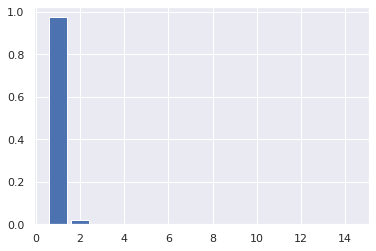

In [20]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)


no. of Components  Variance accounted
      2             99.6077302196102
      3             99.76745921533721
      4             99.90539613345479
      5             99.97368400447967
      6             99.99060052819466
      7             99.99563788531059


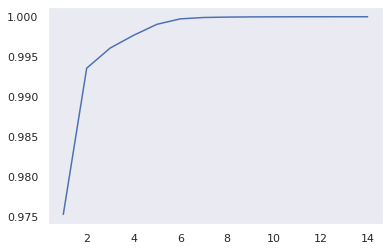

In [21]:
from sklearn.decomposition import PCA
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.grid()

print("no. of Components  Variance accounted")
for i in range (2, 8):
    s = ("      " + str(i)+ "             "+ str(100*var_cumu[i]));
    print(s)

In [22]:
def getPCAMostImportantFeat(model, initial_feature_names):
    # number of components
    n_pcs= model.components_.shape[0]

    # get the index of the most important feature on EACH component based on argument value
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # Create a dictionary for PCA components and most important feature 
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df = pd.DataFrame(dic.items())
    return df

In [23]:
pca_grid_df = getPCAMostImportantFeat(pca,X_train.columns)
pca_grid_df

,0,1
0,PC0,gt_c_o_pressure
1,PC1,gg_rate
2,PC2,turbine_inj_control
3,PC3,hpt_temp
4,PC4,gt_rate
5,PC5,gg_rate
6,PC6,gt_c_o_temp
7,PC7,gt_c_o_temp
8,PC8,gt_c_o_pressure
9,PC9,gt_shaft


In [24]:
pca_4_cpnt = PCA(n_components=4, random_state=42)

In [25]:
navel_pca_data = pca_4_cpnt.fit_transform(X_train)

In [26]:
cmp_lst = []
for i in range(1,5):
    s = 'PC'+ str(i)
    cmp_lst.append(s)

In [27]:
#Create Dataframe
navel_pca_X = pd.DataFrame(navel_pca_data, columns=cmp_lst)
navel_pca_X

,PC1,PC2,PC3,PC4
0,-4.075176,0.338640,-0.104069,-0.271646
1,0.751580,-0.535183,-0.002603,0.045426
2,-3.218126,0.046751,0.082406,-0.084042
3,0.755436,-0.573194,0.066547,0.101727
4,-2.109785,-0.320491,0.110992,-0.066861
...,...,...,...,...
8348,7.191667,0.783968,0.232537,0.113531
8349,4.222719,-0.069220,0.015471,0.096768
8350,-3.254917,0.070804,0.052302,-0.124266
8351,2.211526,-0.468811,-0.162784,-0.059197


In [28]:
navel_pca_X.reset_index(drop=True, inplace=True)

In [29]:
x_pca_cols = pca_grid_df.iloc[:, 1].tolist()

In [30]:
# Transform test set
navel_pca_data_test = pca_4_cpnt.transform(X_test)                               
navel_pca_test_X  = pd.DataFrame(navel_pca_data_test, columns=cmp_lst)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor #Ensemble using averaging method
from xgboost import XGBRegressor #Ensemble using boosting method
from sklearn.ensemble import GradientBoostingRegressor
import time 

### Building the Model 

### 1. Bελτιστοποίηση Αλγορίθμου με επιλογή των κατάληλων παραμέτρων ανάλοαγα με το μοντελο 

### 2. Οι πίνακες με τις μετρικές και τα καλύτερα χαρακτηριστικά ακολουθούν στο τέλος της εκτέλεσης 

In [33]:
# the models that you want to compare
models = {'LinearRegression': LinearRegression(),
          'RandomForestRegressor': RandomForestRegressor(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'DecisionTreeRegressor':DecisionTreeRegressor(),
          'BaggingRegressor' : BaggingRegressor(),
          'XGBRegressor': XGBRegressor()}


# the optimisation parameters for each of the above models
params = {'LinearRegression': [{'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}],
          'RandomForestRegressor': [{'n_estimators': [ 50, 60, 80]}],
          'KNeighborsRegressor': [{'n_neighbors': [2,3,4,5,6]}],
          'DecisionTreeRegressor': [{'max_depth': [2,4,6,8,10,12]}],        
          'BaggingRegressor': [{'base_estimator': [None, GradientBoostingRegressor(), KNeighborsRegressor()],
          'n_estimators': [20,50,100]}],
          'XGBRegressor': [{'n_estimators': [50,500]}]
         }


#models = {'BaggingRegressor' : BaggingRegressor()}
#params = {'BaggingRegressor': [{'base_estimator': [None, KNeighborsRegressor()]}]}

x_pca_cols = pca_grid_df.iloc[:, 1].tolist() 
important_features_list = []
plt.figure(figsize=(20, 12))


def runregressors(X_train, Y_train, X_test, Y_test):
    """
    fits the list of models to the training data, thereby obtaining in each 
    case an evaluation score after GridSearchCV cross-validation
    """
    i_count = 0
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20, 15))
    
    # Evaluations
    result_name = []
    result_summary1 = []
    result_mae = []
    result_mse = []
    result_exp_var = []
    result_r2_score = []
    result_ac_score = []

    for name in models.keys():
        start_time = time.time()
        est = models[name]
        est_params = params[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5) #, verbose=2
        gscv.fit(X_train, Y_train)
        
        msg1 = str(gscv.best_estimator_)
        result_summary1.append(msg1)
        result_name.append(name)
        

        # Evaluate the model
        y_pred = gscv.predict(X_test)
        score = explained_variance_score(Y_test, y_pred)
        mae = mean_absolute_error(Y_test, y_pred)
        mse = mean_squared_error(Y_test, y_pred)
        ascore =gscv.best_estimator_.score( X_test, Y_test)
        r2 = r2_score(Y_test, y_pred)
        msg2 = "%s: %f (%f)" % (name, score*100, mae*100)
        #print(msg2)
        result_mse.append(mse)
        result_mae.append(mae)
        result_exp_var.append(score)
        result_r2_score.append(r2)
        result_ac_score.append(ascore)

        if name == "LinearRegression":
            important_features = pd.Series(gscv.best_estimator_.coef_ , index=x_pca_cols[:4])
        elif name == "KNeighborsRegressor":
            # perform permutation importance
            results = permutation_importance(gscv.best_estimator_, X_train, Y_train, scoring='neg_mean_squared_error')
            # get importance
            important_features = pd.Series(results.importances_mean , index=x_pca_cols[:4])
        elif name == "BaggingRegressor":
            feature_importances = np.mean([tree.feature_importances_ for tree in gscv.best_estimator_], axis=0)
            important_features = pd.Series(feature_importances , index=x_pca_cols[:4])
            #threshold = np.mean(feature_importances)
        else:
            important_features = pd.Series(gscv.best_estimator_.feature_importances_ , index=x_pca_cols[:4])
        important_features_list.append(important_features)
        dur = time.time()-start_time
        print(dur)
        #important_features.sort_values().plot(kind = 'barh')
        col = i_count%2
        row = i_count//2
        ax[row][col].scatter(Y_test, y_pred)
        ax[row][col].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
        ax[row][col].set_xlabel('Measured')
        ax[row][col].set_ylabel('Predicted')
        ax[row][col].set_title(msg2)
        i_count+=1
            
    plt.show()

    
    result_summary_list = pd.DataFrame({'name': result_name,
                                        'best_estimator': result_summary1,
                                        'R2': result_r2_score,
                                        'MAE': result_mae,
                                        'MSE': result_mse,
                                        'explained variance score': result_exp_var,
                                        'accuracy': result_ac_score})
    return result_summary_list

<Figure size 1440x864 with 0 Axes>

0.26148414611816406
22.164814949035645
1.4830152988433838
0.8117709159851074
588.2066133022308
6.655364990234375


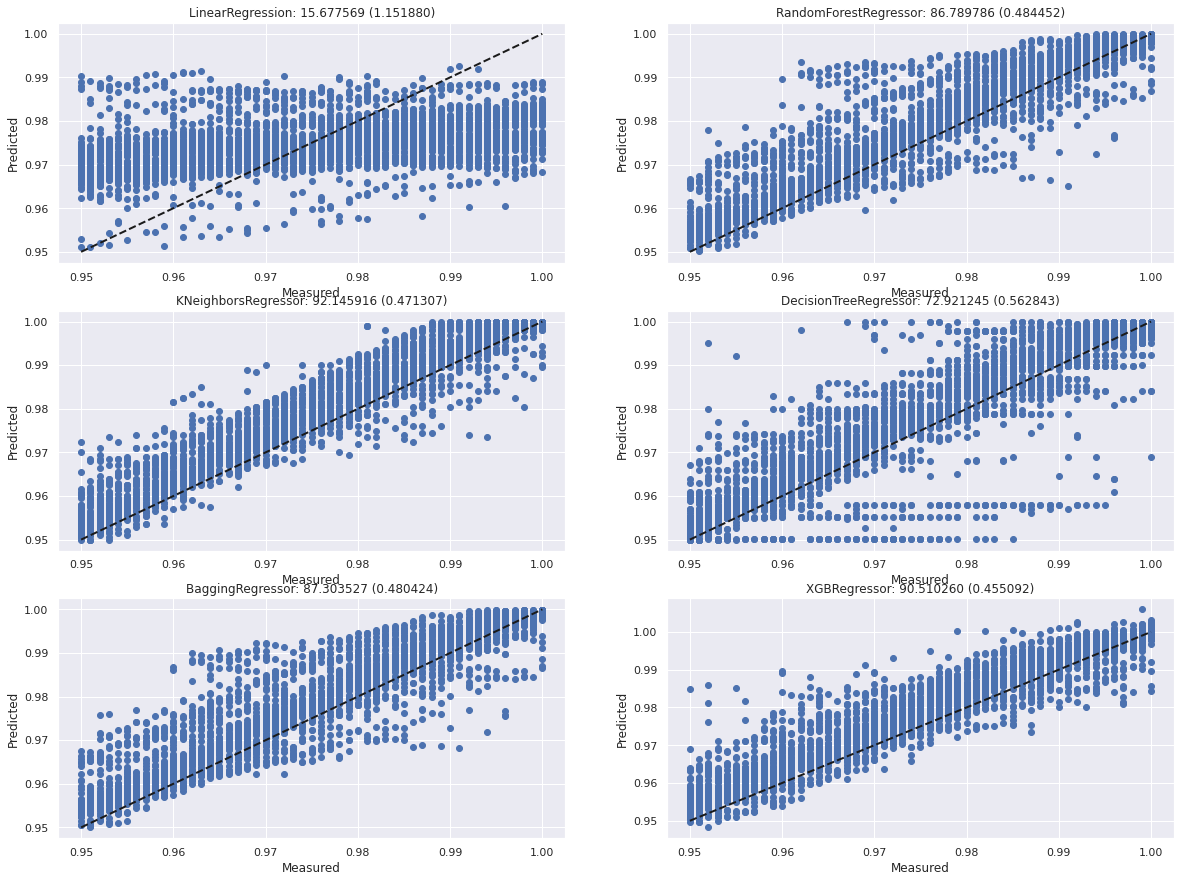

In [34]:
# Predicting Compressor Decay
result_summary_list = runregressors(navel_pca_X, y_train_c, navel_pca_test_X, y_test_c)

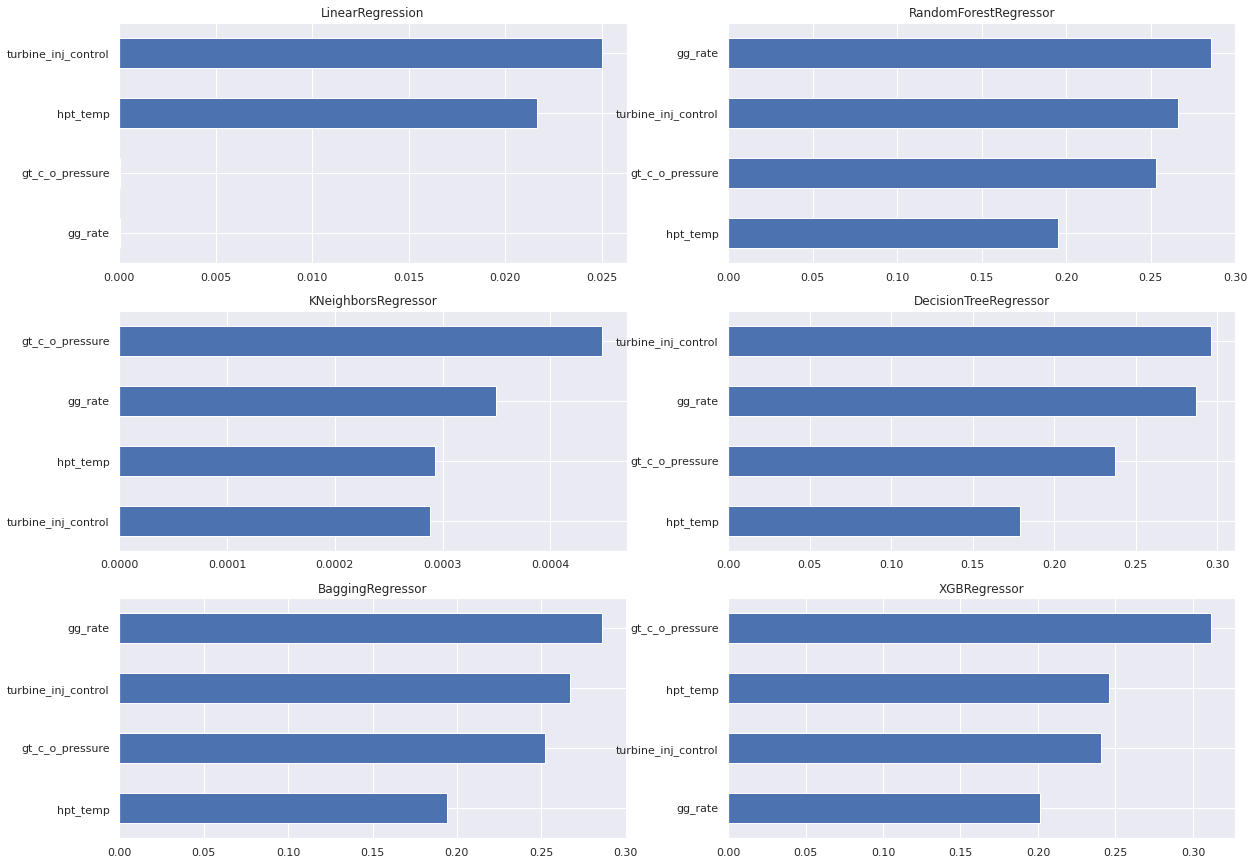

In [35]:
for i in range(0,4):
    important_features_list[0][i]  = abs(important_features_list[0][i])

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20, 15))
i_count = 0
nm = result_summary_list.name.to_list()
for imp_fea in important_features_list:
    col = i_count%2
    row = i_count//2
    imp_fea.sort_values().plot(kind = 'barh', ax = ax[row][col] )
    ax[row][col].set_title(nm[i_count])
    i_count+=1
            
plt.show()


In [36]:
result_summary_list

,name,best_estimator,R2,MAE,MSE,explained variance score,accuracy
0,LinearRegression,LinearRegression(normalize=True),0.156181,0.011519,0.000185,0.156776,0.156181
1,RandomForestRegressor,RandomForestRegressor(n_estimators=50),0.803083,0.004845,0.000043,0.867898,0.803083
2,KNeighborsRegressor,KNeighborsRegressor(n_neighbors=2),0.843396,0.004713,0.000034,0.921459,0.843396
3,DecisionTreeRegressor,DecisionTreeRegressor(max_depth=12),0.704314,0.005628,0.000065,0.729212,0.704314
4,BaggingRegressor,BaggingRegressor(n_estimators=100),0.812096,0.004804,0.000041,0.873035,0.812096
5,XGBRegressor,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.842347,0.004551,0.000034,0.905103,0.842347


0.25386500358581543
23.35906147956848
1.5557739734649658
0.772676944732666
598.2449154853821
6.176840543746948


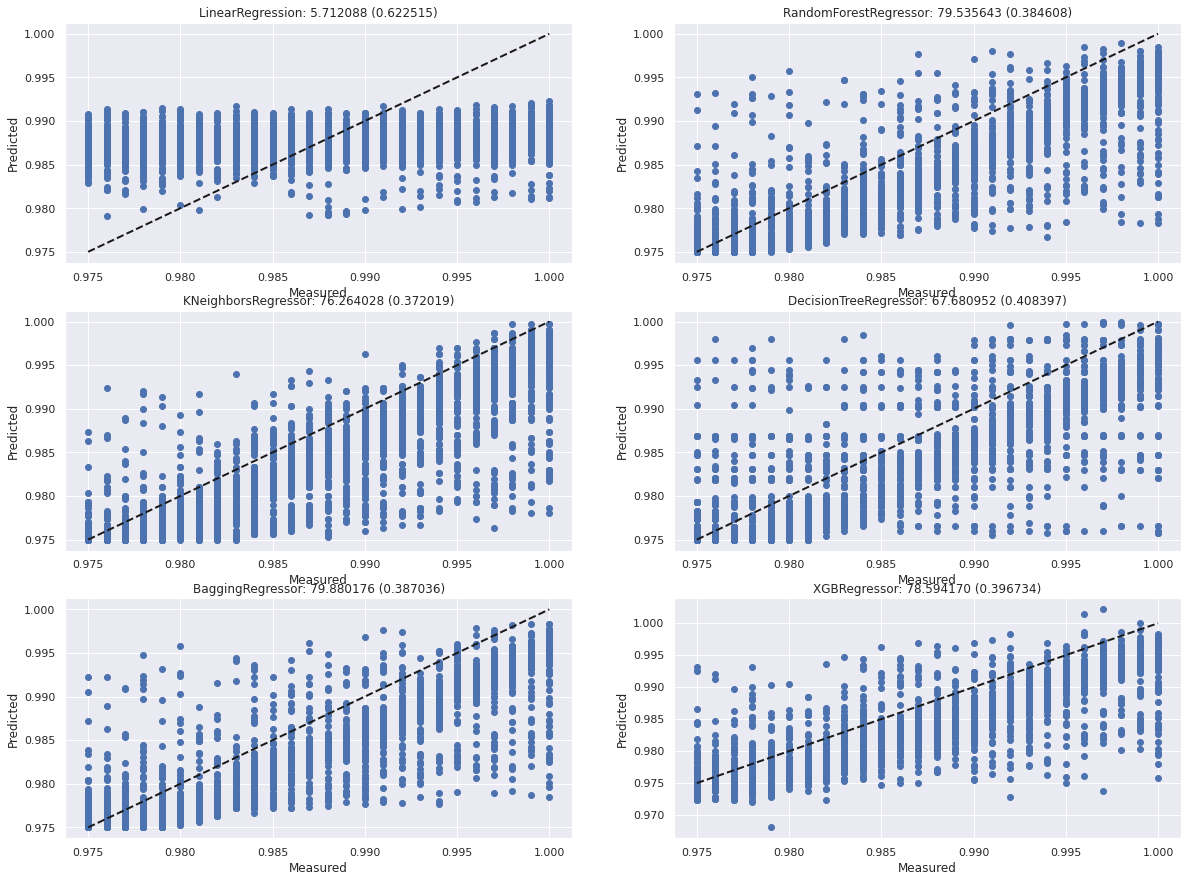

In [37]:
#Predicting Turbine Decay 

result_summary_list_t= runregressors(navel_pca_X, y_train_t, navel_pca_test_X, y_test_t)

In [38]:
result_summary_list_t

,name,best_estimator,R2,MAE,MSE,explained variance score,accuracy
0,LinearRegression,LinearRegression(),0.057081,0.006225,0.000053,0.057121,0.057081
1,RandomForestRegressor,RandomForestRegressor(n_estimators=60),0.614056,0.003846,0.000022,0.795356,0.614056
2,KNeighborsRegressor,KNeighborsRegressor(n_neighbors=3),0.570676,0.003720,0.000024,0.762640,0.570676
3,DecisionTreeRegressor,DecisionTreeRegressor(max_depth=12),0.541871,0.004084,0.000026,0.676810,0.541871
4,BaggingRegressor,BaggingRegressor(n_estimators=100),0.611939,0.003870,0.000022,0.798802,0.611939
5,XGBRegressor,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.586874,0.003967,0.000023,0.785942,0.586874


Για το Compressor Decay:  Ο ΚNeighborRegressor φαινεται να ειναι το καλύτερο μοντέλο πρόβλεψης 

Για το Turbine Decay: Bλέπουμε ότι τα περισσότερα μοντέλα, παρά τις μετρικές που λάβαμε φαίνεται να οδηγούν σε χαμηλό generalization.